In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [2]:
start = '2014-01-01'
end = '2024-07-09'

stock = 'GOOG'

data =  yf.download(stock,start,end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218


In [3]:
data.reset_index(inplace=True)


In [4]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-01-02,27.782366,27.839401,27.603037,27.724083,27.692570,73129082
1,2014-01-03,27.770908,27.818977,27.520098,27.521841,27.490559,66917888
2,2014-01-06,27.721344,27.867046,27.557707,27.828691,27.797060,71037271
3,2014-01-07,28.019974,28.385853,27.924334,28.365179,28.332937,102486711
4,2014-01-08,28.543015,28.575891,28.226450,28.424210,28.391901,90036218
...,...,...,...,...,...,...,...
2640,2024-07-01,184.479996,185.339996,182.729996,184.490005,184.490005,11815900
2641,2024-07-02,183.470001,186.949997,183.059998,186.610001,186.610001,12555500
2642,2024-07-03,186.300003,187.619995,185.384995,187.389999,187.389999,7409100
2643,2024-07-05,187.320007,192.259995,187.320007,191.960007,191.960007,14303400


In [5]:
#moving avg
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
2640    160.7522
2641    161.1515
2642    161.5532
2643    161.9706
2644    162.3881
Name: Close, Length: 2645, dtype: float64

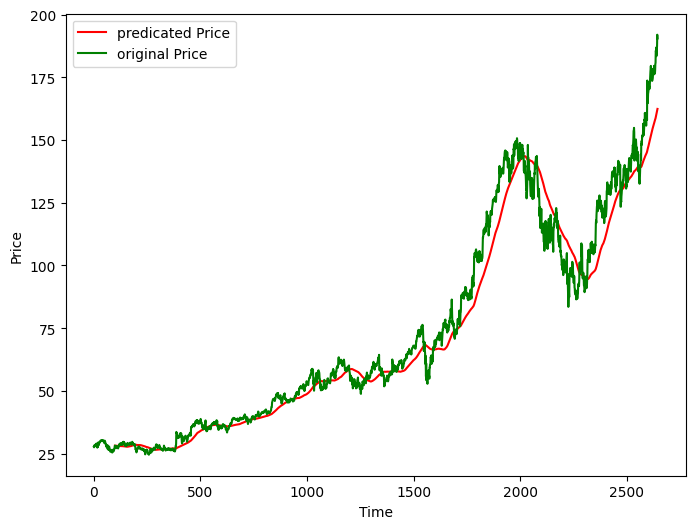

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days,'r',label = 'predicated Price')
plt.plot(data.Close,'g',label = 'original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()



In [7]:
ma_200_days = data.Close.rolling(200).mean()

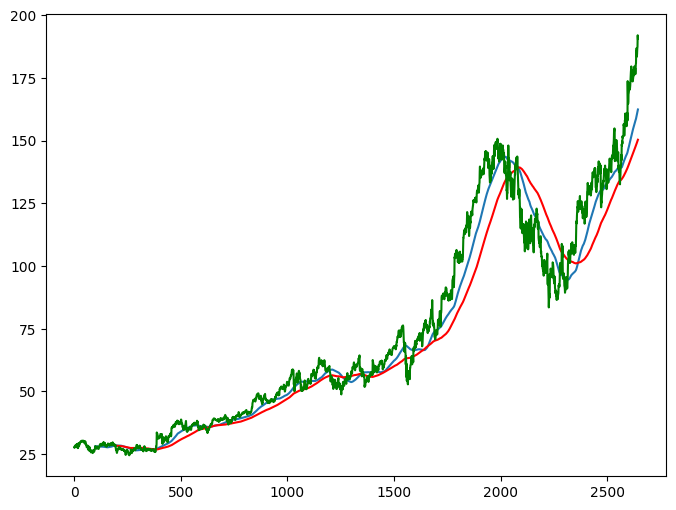

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days)
plt.plot(ma_200_days,'r')
plt.plot(data.Close,'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
# 80% data will be train dataset remaining 20% testdataset
data_train =pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])


In [11]:
data_train.shape[0]

2116

In [12]:
data_test.shape[0]

529

In [13]:
data_test.head()

,Close
2116,112.799004
2117,114.039001
2118,114.137001
2119,117.746002
2120,114.564003


In [14]:
#Scalling 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [15]:
data_train_scale = scaler.fit_transform(data_train)
#data_train_scale

In [16]:
x = []
y = []

for i in range(100,data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

#100 days of data is x train and 101 days data is y train


In [17]:
x,y = np.array(x), np.array(y)

In [18]:
from  keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [19]:
#4 LSTM layers each layer will have diffrent neurons

model = Sequential()
model.add(LSTM(units=50, activation='relu' ,return_sequences= True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

c:\Users\DELL\Downloads\python\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
#compile for time series analysis mean square error
model.compile(optimizer=  'adam', loss ='mean_squared_error')

In [21]:
# fitting the model
model.fit(x,y,epochs = 50,batch_size=32, verbose=1)


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 29s 224ms/step - loss: 0.0653
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 218ms/step - loss: 0.0059
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 212ms/step - loss: 0.0061
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0044
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 202ms/step - loss: 0.0052
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 204ms/step - loss: 0.0048
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 200ms/step - loss: 0.0045
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - loss: 0.0044
Epoch 9/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0039
Epoch 10/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 13s 203ms/step - loss: 0.0043
Epoch 11/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 18s 283ms/step - loss: 0.0040
Epoch 12/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 221ms/step - loss: 0.0034
Epoch 13/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 223ms/step - loss: 0.0039
Epoch 14/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - loss: 0.0041
Epoch 15/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [23]:
pas_100_days = data_train.tail(100)
#past 100 days data from train data

In [24]:
data_test = pd.concat([pas_100_days,data_test],ignore_index = True)

In [25]:
data_test_scale = scaler.fit_transform(data_test)

In [26]:
x = []
y = []

for i in range(100,data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])

x,y = np.array(x),np.array(y)


In [27]:
y_predict = model.predict(x)


17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 159ms/step


In [28]:
scaler.scale_

array([0.00921914])

In [29]:
scale = 1/scaler.scale_

In [30]:
y_predict= y_predict*scale

In [31]:
y = y*scale

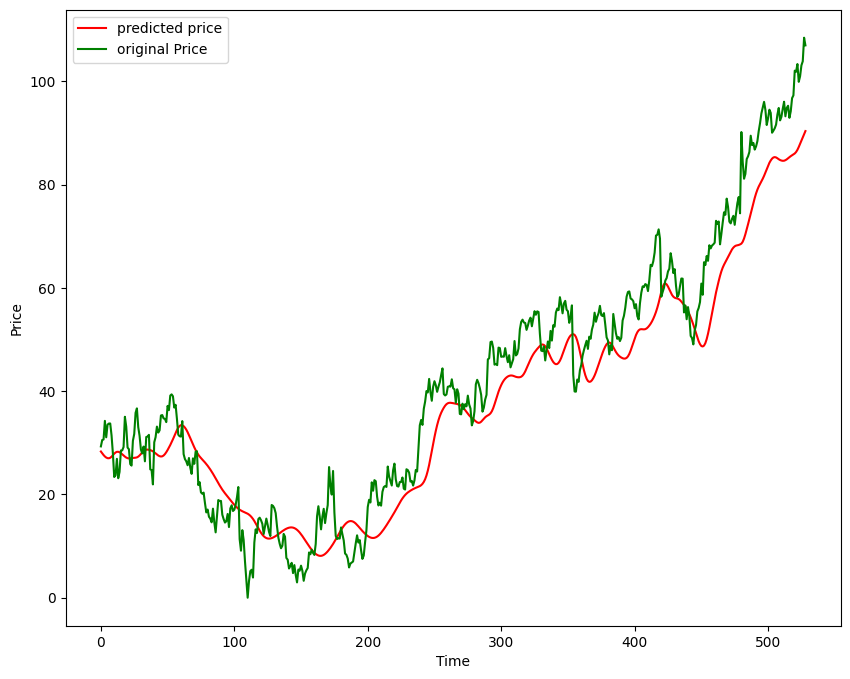

In [32]:
plt.figure(figsize=(10,8))
plt.plot(y_predict,'r',label='predicted price')
plt.plot(y,'g',label = 'original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [33]:
model.save('Stock_Predications_Model.keras')